In [1]:
import pandas as pd
import numpy as np

### Análise

- média e desvio de score por game

In [2]:
df = pd.read_csv("./data/arcade.csv")

jogo_memoria = df[df["game"] == "Memória"]
jogo_reflexo = df[df["game"] == "Reflexo"]

memoria_lista = jogo_memoria["score"]
reflexo_lista = jogo_reflexo["score"]

print(f"O Jogo de Memória teve a seguinte media: {np.mean(memoria_lista):.2f}")
print(f"O Jogo de Memória teve o seguinte desvio: {np.std(memoria_lista):.2f}")
print(f"O Jogo de Reflexo teve a seguinte media: {np.mean(reflexo_lista):.2f}")
print(f"O Jogo de Reflexo teve o seguinte desvio: {np.std(reflexo_lista):.2f}")



O Jogo de Memória teve a seguinte media: 476.87
O Jogo de Memória teve o seguinte desvio: 13.24
O Jogo de Reflexo teve a seguinte media: 47.16
O Jogo de Reflexo teve o seguinte desvio: 29.26


- média e desvio por player

In [3]:

lista_jogadores = []
for player in df["player"]:
    if player not in lista_jogadores:
        lista_jogadores.append(player)
    else:
        pass

for jogador in lista_jogadores:
    score_jogador = df[df["player"] == jogador]["score"]
    print(f"Jogador: {jogador} \nMédia: {np.mean(score_jogador):.2f} \nDesvio: {np.std(score_jogador):.2f}\n")




Jogador: Ana 
Média: 237.20 
Desvio: 218.08

Jogador: Bruno 
Média: 283.17 
Desvio: 214.76

Jogador: Carlos 
Média: 270.09 
Desvio: 218.86

Jogador: Daniela 
Média: 245.45 
Desvio: 210.13

Jogador: Eduardo 
Média: 299.45 
Desvio: 211.60



- média diária por player (usar ts → dia)

In [4]:


df["ts"] = pd.to_datetime(df["ts"])

df["dia"] = df["ts"].dt.date


divisao = df.groupby(["player", "dia"])["score"].mean()
print(divisao)

player   dia       
Ana      2025-01-01    184.033333
         2025-01-02    314.020000
         2025-01-03     43.333333
         2025-01-04    123.180000
         2025-01-05    325.200000
         2025-01-06    385.700000
         2025-01-07    210.766667
Bruno    2025-01-01    182.500000
         2025-01-02    165.333333
         2025-01-03    382.850000
         2025-01-04    366.025000
         2025-01-05    372.925000
         2025-01-06    221.800000
         2025-01-07    251.450000
Carlos   2025-01-01    184.775000
         2025-01-02    478.400000
         2025-01-03    201.620000
         2025-01-04    169.733333
         2025-01-05    399.660000
         2025-01-06    222.320000
         2025-01-07    184.200000
Daniela  2025-01-01    145.450000
         2025-01-02    149.125000
         2025-01-03    294.840000
         2025-01-04    348.766667
         2025-01-05    262.025000
         2025-01-06    219.800000
         2025-01-07    342.200000
Eduardo  2025-01-01    270.8

- Percentis p10/p50/p90 por jogo (NumPy).

In [5]:
memoria_percentis = np.percentile(df[df["game"] == "Memória"]["score"], [10, 50, 90])
reflexo_percentis = np.percentile(df[df["game"] == "Reflexo"]["score"], [10, 50, 90])
print(memoria_percentis)
print(reflexo_percentis)

[458.96 477.6  494.71]
[10. 50. 90.]


- Z-score do score por jogo para marcar partidas “Épicas” (|z| ≥ 2).

In [7]:
z_scores_memoria = np.round(((np.array(memoria_lista) - np.mean(memoria_lista))/np.std(memoria_lista)), 2)
z_scores_reflexo = np.round(((np.array(reflexo_lista) - np.mean(reflexo_lista))/np.std(reflexo_lista)), 2)

print(z_scores_memoria)
print(z_scores_reflexo)

partidas_epicas_memoria = np.argsort(z_scores_memoria)[::-1]
partidas_epicas_reflexo = np.argsort(z_scores_reflexo)[::-1]

memoria_indices_originais = jogo_memoria.index.values
jogos_memoria = memoria_indices_originais[partidas_epicas_memoria]
top5_memoria = df.loc[jogos_memoria[:5]]

reflexo_indices_originais = jogo_reflexo.index.values
jogos_reflexo = reflexo_indices_originais[partidas_epicas_reflexo]
top5_reflexo = df.loc[jogos_reflexo[:5]]

print(top5_memoria)
print(top5_reflexo)

[-1.12  1.45  1.04  1.25  1.44 -1.09  1.23 -1.24 -0.48  0.88 -1.34  0.41
 -0.71 -0.82 -0.25  0.68  0.38 -1.1   0.06 -0.2  -1.68  1.67  0.09  0.42
 -0.02 -1.75  0.4   1.68  0.74 -0.38  0.47 -0.37 -0.22 -0.96  1.69 -0.1
  1.29 -1.93  0.8   0.29  1.06 -0.32 -1.89 -1.54 -0.44  0.32 -1.12  0.14
  0.06  0.42 -0.84 -0.9  -0.21 -1.45  0.91  0.28 -0.31  0.63 -0.65 -1.93
  0.27 -0.01  1.58  1.35  0.96 -1.25 -0.69  1.    0.67  1.35]
[ 1.12 -1.27 -0.59  0.44  1.46 -0.24 -1.61  0.1  -1.27 -1.61  0.44 -0.93
  0.1   1.12  0.78  0.44 -0.93 -0.93 -1.27  1.46  0.1   0.44 -1.61  0.44
  1.46 -0.24 -0.59  1.12  0.78  1.46 -0.24 -1.61 -0.59 -1.27 -1.61  1.46
 -1.27  0.78  0.44 -1.27  0.78 -1.27  0.1   0.78  0.78 -0.59 -0.24 -0.93
 -0.24  1.46 -0.59  0.78  0.44  1.12 -0.93  1.12  0.78  0.44  1.46  0.44
  1.46 -1.27  0.1  -1.27  0.44 -1.27  1.12]
                     ts   player     game  score         dia
67  2025-01-04 06:38:05   Carlos  Memória  499.2  2025-01-04
57  2025-01-01 08:58:26   Carlos  Memória  

### Visualização

- Top 5 jogadores (barra) por score médio.

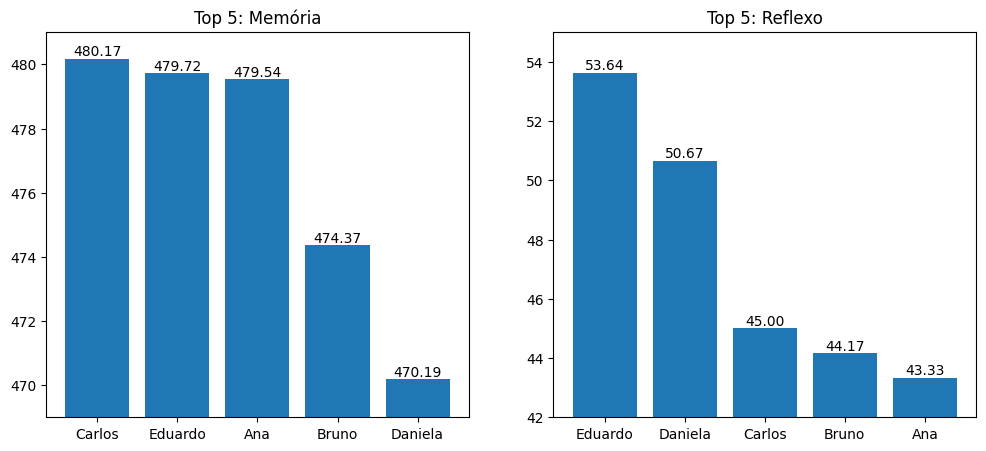

In [42]:
import matplotlib.pyplot as plt

df_top5 = df.groupby(["player", "game"])["score"].mean().reset_index(name="score_medio").round(2)

df_maximos = df_top5.sort_values(by=["game", "score_medio"], ascending=[True, False])

maximos_memoria = df_maximos[df_maximos["game"] == "Memória"]
maximos_reflexo = df_maximos[df_maximos["game"] == "Reflexo"]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
barras = ax[0].bar(maximos_memoria["player"], maximos_memoria["score_medio"])
ax[0].set_ylim(469, 481)
ax[0].set_title("Top 5: Memória")

for barra in barras:
    altura = barra.get_height()
    ax[0].text(barra.get_x() + barra.get_width() / 2, altura, f"{altura:.2f}", ha="center", va="bottom")


barras = ax[1].bar(maximos_reflexo["player"], maximos_reflexo["score_medio"])
ax[1].set_ylim(42, 55)
ax[1].set_title("Top 5: Reflexo")

for barra in barras:
    altura = barra.get_height()
    ax[1].text(barra.get_x() + barra.get_width() / 2, altura, f"{altura:.2f}", ha="center", va="bottom")


- Histograma de score por jogo (um por vez).

Text(0.5, 1.0, 'Histograma Score: Reflexo')

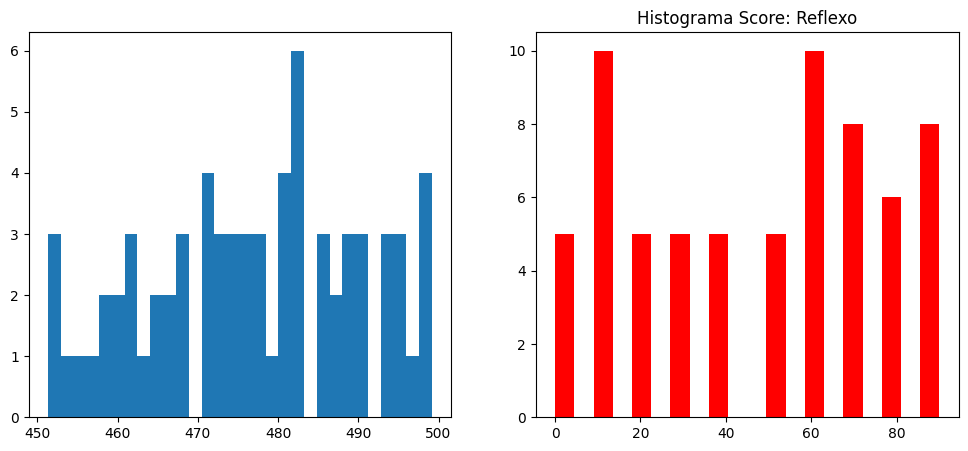

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

histograma_memoria = ax[0].hist(jogo_memoria["score"], bins=30)
plt.title("Histograma Score: Memória")

histograma_reflexo = ax[1].hist(jogo_reflexo["score"], bins=20, color="red")
plt.title("Histograma Score: Reflexo")

- Série temporal: média diária de score do jogador selecionado.


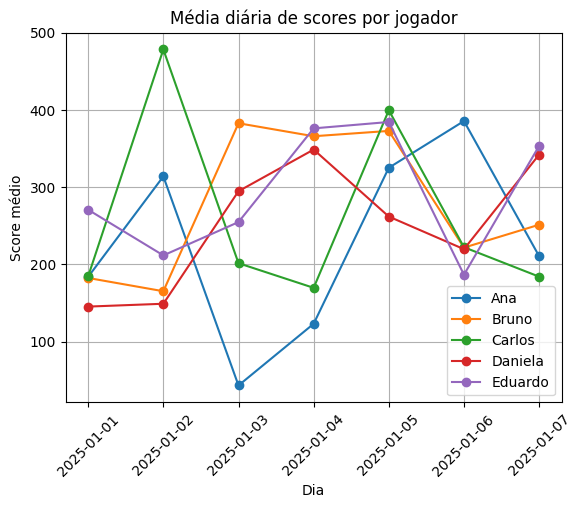

In [106]:
media_diaria = (
    df.groupby(["dia", "player"])["score"]
      .mean()
      .reset_index()
      .sort_values(by=["dia", "player"]).round(2)
)

for player, grupo in media_diaria.groupby("player"):
    plt.plot(grupo["dia"], grupo["score"], marker="o", linestyle="-", label=player)

plt.title("Média diária de scores por jogador")
plt.xlabel("Dia")
plt.ylabel("Score médio")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()